In [13]:
# Install required packages if not already installed
!pip install opencv-python-headless matplotlib scikit-image scikit-learn --quiet

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import slic, felzenszwalb, quickshift
from skimage.color import label2rgb
from sklearn.cluster import KMeans


C:\Users\monis\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\Users\monis\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\Users\monis\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


In [27]:
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from scipy import ndimage


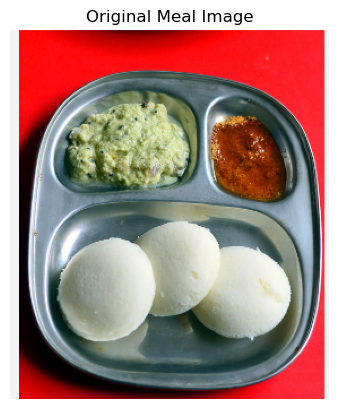

In [5]:
# Step 2: Load and preprocess the image
image_path = r"C:\Users\monis\OneDrive\Pictures\Screenshots\Screenshot 2025-04-04 150529.png" # Change this to your meal image filename
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title("Original Meal Image")
plt.axis('off')
plt.show()


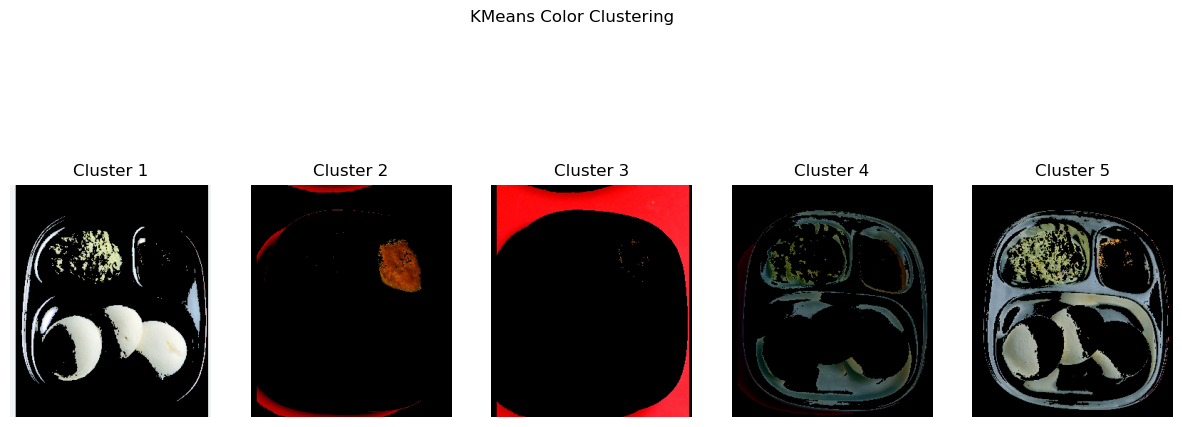

In [9]:
def segment_kmeans(img, k=5):
    h, w, c = img.shape
    img_flat = img.reshape((-1, 3))

    kmeans = KMeans(n_clusters=k, random_state=42).fit(img_flat)
    clustered = kmeans.labels_.reshape(h, w)

    segmented_images = []
    for i in range(k):
        mask = (clustered == i)
        seg = img.copy()
        seg[~mask] = 0
        segmented_images.append(seg)

    return segmented_images

segments = segment_kmeans(image, k=5)

plt.figure(figsize=(15, 6))
for i, seg in enumerate(segments):
    plt.subplot(1, 5, i + 1)
    plt.imshow(seg)
    plt.axis('off')
    plt.title(f"Cluster {i + 1}")
plt.suptitle("KMeans Color Clustering")
plt.show()


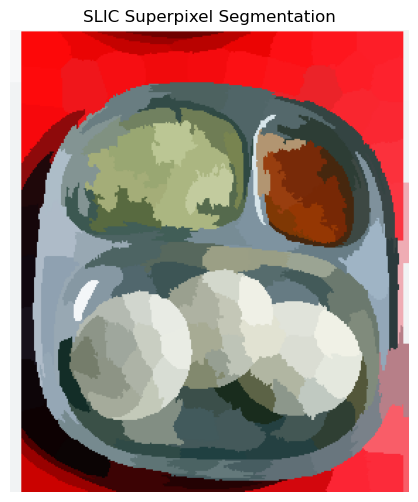

In [15]:
def segment_slic(img, n_segments=200):
    labels = slic(img, n_segments=n_segments, compactness=10, start_label=1)
    return label2rgb(labels, img, kind='avg')

slic_result = segment_slic(image)

plt.figure(figsize=(6,6))
plt.imshow(slic_result)
plt.title("SLIC Superpixel Segmentation")
plt.axis('off')
plt.show()


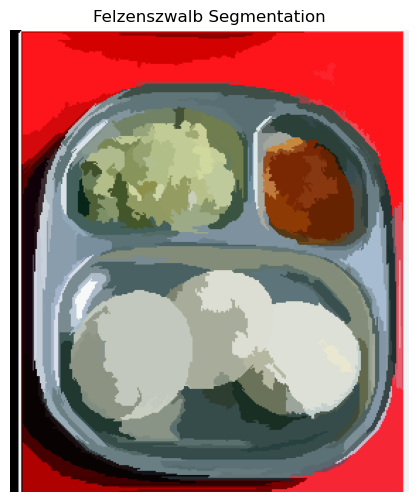

In [17]:
def segment_felzenszwalb(img):
    segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
    return label2rgb(segments_fz, img, kind='avg')

fz_result = segment_felzenszwalb(image)

plt.figure(figsize=(6,6))
plt.imshow(fz_result)
plt.title("Felzenszwalb Segmentation")
plt.axis('off')
plt.show()


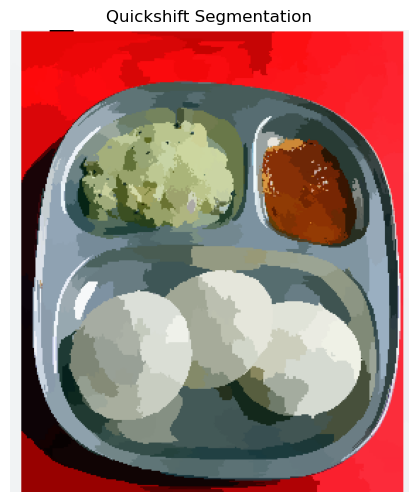

In [19]:
def segment_quickshift(img):
    segments_qs = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)
    return label2rgb(segments_qs, img, kind='avg')

qs_result = segment_quickshift(image)

plt.figure(figsize=(6,6))
plt.imshow(qs_result)
plt.title("Quickshift Segmentation")
plt.axis('off')
plt.show()


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\monis\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\monis\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\monis\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Users\monis\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\monis\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\monis\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\monis\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Users\monis\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [15]:
pip install --upgrade numpy h5py


  Using cached h5py-3.13.0-cp312-cp312-win_amd64.whl.metadata (2.5 kB)
Using cached h5py-3.13.0-cp312-cp312-win_amd64.whl (3.0 MB)
  Attempting uninstall: h5py
    Found existing installation: h5py 3.11.0
    Uninstalling h5py-3.11.0:
      Successfully uninstalled h5py-3.11.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.


In [2]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# Check GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Dataset path
data_dir = r"C:\Users\monis\OneDrive\Desktop\Final Dataset - Cleaned"

# Data transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# Load dataset
train_dataset = ImageFolder(root=data_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Class names
class_names = train_dataset.classes
print("Classes:", class_names)

# Model - Transfer learning with ResNet18
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, len(class_names))  # Replace final layer
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    acc = 100 * correct / total
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}, Accuracy: {acc:.2f}%")

# Save the trained model
torch.save(model.state_dict(), "indian_food_classifier.pth")
print("✅ Model saved successfully!")


Using device: cpu
Classes: ['achar', 'aloo gobi', 'aloo matar', 'aloo methi', 'aloo puri', 'aloo tikki', 'appam', 'apple', 'apple pie', 'bagels', 'baingan bharta', 'banana', 'basundi', 'beetroot', 'besan cheela', 'besan laddu', 'bhel puri', 'bhindi masala', 'biryani', 'boondi', 'brownie', 'butter chicken', 'cabbage', 'cake', 'canned potatoes', 'capsicum', 'carrots', 'cauliflower', 'chai', 'chana masala', 'chapati', 'chicken rezala', 'chicken tikka', 'chicken tikka masala', 'chilli pepper', 'chilli potato', 'chole bhature', 'chop suey', 'chow mein', 'cooked oatmeal', 'cooked pasta', 'corn', 'cucumber', 'dal makhani', 'dal tadka', 'dhokla', 'doughnut', 'dum aloo', 'fried chicken', 'fried fish', 'fried rice', 'gajar ka halwa', 'garlic', 'ginger', 'gobi manchurian', 'grape', 'gujiya', 'gulab jamun', 'hot dogs', 'ice cream', 'idli', 'imarti', 'jalebi', 'kachori', 'kadai paneer', 'kadhi pakoda', 'kaju katli', 'kalakand', 'kathi roll', 'kebabs', 'khandvi', 'khichdi', 'khubani ka meetha', 'kiw

C:\Users\monis\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\monis\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\monis\anaconda3\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
C:\Users\monis\anaconda3\Lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


Epoch 1/10, Loss: 1760.8941, Accuracy: 31.77%
Epoch 2/10, Loss: 1007.6326, Accuracy: 55.99%
Epoch 3/10, Loss: 685.4065, Accuracy: 68.86%
Epoch 4/10, Loss: 472.7212, Accuracy: 78.14%
Epoch 5/10, Loss: 342.1492, Accuracy: 83.67%
Epoch 6/10, Loss: 248.1335, Accuracy: 87.84%
Epoch 7/10, Loss: 187.0810, Accuracy: 90.85%
Epoch 8/10, Loss: 158.4853, Accuracy: 92.42%
Epoch 9/10, Loss: 158.0512, Accuracy: 92.04%
Epoch 10/10, Loss: 139.8551, Accuracy: 92.86%
✅ Model saved successfully!


In [3]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.optim as optim
from torchvision import models

In [8]:
import torch
from torchvision import models
import torch.nn as nn

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Class names (use the same list you used during training)
class_names = ['achar', 'aloo gobi', 'aloo matar', 'aloo methi', 'aloo puri', 'aloo tikki', 'appam', 'apple', 'apple pie', 'bagels', 'baingan bharta', 'banana', 'basundi', 'beetroot', 'besan cheela', 'besan laddu', 'bhel puri', 'bhindi masala', 'biryani', 'boondi', 'brownie', 'butter chicken', 'cabbage', 'cake', 'canned potatoes', 'capsicum', 'carrots', 'cauliflower', 'chai', 'chana masala', 'chapati', 'chicken rezala', 'chicken tikka', 'chicken tikka masala', 'chilli pepper', 'chilli potato', 'chole bhature', 'chop suey', 'chow mein', 'cooked oatmeal', 'cooked pasta', 'corn', 'cucumber', 'dal makhani', 'dal tadka', 'dhokla', 'doughnut', 'dum aloo', 'fried chicken', 'fried fish', 'fried rice', 'gajar ka halwa', 'garlic', 'ginger', 'gobi manchurian', 'grape', 'gujiya', 'gulab jamun', 'hot dogs', 'ice cream', 'idli', 'imarti', 'jalebi', 'kachori', 'kadai paneer', 'kadhi pakoda', 'kaju katli', 'kalakand', 'kathi roll', 'kebabs', 'khandvi', 'khichdi', 'khubani ka meetha', 'kiwi', 'kofta', 'kulfi', 'lassi', 'lemon', 'lemonade', 'lettuce', 'litti chokha', 'macaroni salad', 'malpua', 'mango', 'masala dosa', 'medu vada', 'mishti doi', 'missi roti', 'modak', 'momos', 'muffin', 'mysore pak', 'naan bread', 'navratan korma', 'omelette', 'onion', 'onion pakoda', 'orange', 'palak paneer', 'pan cake', 'pan-fried prawns', 'paneer butter masala', 'pani puri', 'papad', 'paprika', 'paratha', 'pav bhaji', 'peanut chikki', 'pear', 'peas', 'peda', 'phirni', 'pineapple', 'pizza', 'poha', 'pomegranate', 'popcorn', 'rabri', 'radish', 'raj kachori', 'rajma', 'ras malai', 'rasgulla', 'rice cooked', 'samosa', 'sandwich', 'scrambled eggs', 'shankarpali', 'sheer khurma', 'sheera', 'shelled soy bean', 'shrikhand', 'spinach', 'spring rolls', 'sprouts', 'stuffed karela', 'sunny side up eggs', 'sweet potatoes', 'taco', 'tiramisu', 'toast', 'tomato', 'turnip', 'uttapam', 'vada pav', 'veggie burger', 'waffle', 'watermelon']  # Update if needed

# Recreate the model architecture
model = models.resnet18(pretrained=False)  # Note: pretrained=False here, we’ll load our own weights
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, len(class_names))
model = model.to(device)

# Load the trained weights
model.load_state_dict(torch.load("indian_food_classifier.pth", map_location=device))
model.eval()  # Set model to evaluation mode
print("✅ Model loaded and ready for inference!")


C:\Users\monis\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\monis\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


✅ Model loaded and ready for inference!


C:\Users\monis\AppData\Local\Temp\ipykernel_17240\2957540900.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("indian_food_classifier.pt

In [18]:
from torchvision import transforms
from PIL import Image

# Redefine the same transform used during training
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# Define image prediction function
def predict_image(image_path, model, transform, class_names):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)  # Add batch dimension
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
    return class_names[predicted.item()]


# Example
test_image_path =r"C:\Users\monis\OneDrive\Pictures\Screenshots\Screenshot 2025-04-05 232851.png"
predicted_food = predict_image(test_image_path, model, transform, class_names)
print("Predicted Food Item:", predicted_food)


Predicted Food Item: paneer butter masala


In [22]:
import cv2
import numpy as np
import os

# Load image
image_path = r"C:\Users\monis\OneDrive\Pictures\Screenshots\Screenshot 2025-04-05 234157.png"
img = cv2.imread(image_path)
orig = img.copy()

# Resize for faster processing (optional)
img = cv2.resize(img, (800, 800))
orig = img.copy()

# ----------------------- Step 1: Apply GrabCut for background removal -----------------------
mask = np.zeros(img.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Rectangle around the plate (you can tune it)
height, width = img.shape[:2]
rect = (10, 10, width-20, height-20)

# GrabCut
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
img_fg = img * mask2[:, :, np.newaxis]

# ----------------------- Step 2: Convert to grayscale and threshold -----------------------
gray = cv2.cvtColor(img_fg, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# ----------------------- Step 3: Morphological operations -----------------------
kernel = np.ones((5, 5), np.uint8)
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
morph = cv2.dilate(morph, kernel, iterations=1)

# ----------------------- Step 4: Contour detection -----------------------
contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# ----------------------- Step 5: Crop and save each segmented food item -----------------------
output_folder = "cropped_food_items_v2"
os.makedirs(output_folder, exist_ok=True)

count = 0
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)

    # Filter out small areas and very narrow shapes
    if cv2.contourArea(cnt) < 2000 or w/h > 4 or h/w > 4:
        continue

    crop = orig[y:y+h, x:x+w]
    crop_resized = cv2.resize(crop, (224, 224))  # Resize for classifier

    filename = os.path.join(output_folder, f"food_{count}.jpg")
    cv2.imwrite(filename, crop_resized)
    print(f"✅ Saved: {filename}")
    count += 1

print(f"\n🍛 Total food items detected and saved: {count}")


✅ Saved: cropped_food_items_v2\food_0.jpg

🍛 Total food items detected and saved: 1


In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import os

# Load and resize image
image = cv2.imread(r"C:\Users\monis\OneDrive\Pictures\Screenshots\Screenshot 2025-04-04 150529.png")
resized = cv2.resize(image, (300, 300))  # Resize for speed
original = resized.copy()

# Reshape image to (N, 3)
pixel_values = resized.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# KMeans clustering
k = 4  # Try different values (3-6) for best results
kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
labels = kmeans.fit_predict(pixel_values)
centers = np.uint8(kmeans.cluster_centers_)

# Map labels to original image shape
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(resized.shape)

# Create directory to save crops
os.makedirs("food_segments", exist_ok=True)

# Loop over each cluster to extract segment
for i in range(k):
    mask = (labels == i).astype(np.uint8)
    mask = mask.reshape(resized.shape[:2]) * 255

    # Morphological operations to clean mask
    kernel = np.ones((3, 3), np.uint8)
    cleaned = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    # Find contours
    contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for idx, cnt in enumerate(contours):
        x, y, w, h = cv2.boundingRect(cnt)
        if w > 30 and h > 30:  # Filter tiny blobs
            crop = original[y:y+h, x:x+w]
            cv2.imwrite(f"food_segments/cluster{i}_part{idx}.jpg", crop)
            cv2.rectangle(resized, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Show segmented clusters
cv2.imshow("Segmented", segmented_image)
cv2.imshow("Detected Items", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\monis\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\monis\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\monis\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Users\monis\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\monis\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\monis\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\monis\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Users\monis\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\monis\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\monis\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\monis\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Users\monis\anaconda3\Lib\site-pack

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\monis\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\monis\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\monis\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Users\monis\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [ ]:
pip install numpy==1.26.4


In [10]:
import os
import torch
from torchvision import transforms, models
from PIL import Image
import torch.nn as nn

# Load the model
model = models.resnet18(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 148)
model.load_state_dict(torch.load("indian_food_classifier.pth"))
model.eval()

# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# Class names
class_names = ['achar', 'aloo gobi', 'aloo matar', 'aloo methi', 'aloo puri', 'aloo tikki', 'appam', 'apple', 'apple pie',
               'bagels', 'baingan bharta', 'banana', 'basundi', 'beetroot', 'besan cheela', 'besan laddu', 'bhel puri',
               'bhindi masala', 'biryani', 'boondi', 'brownie', 'butter chicken', 'cabbage', 'cake', 'canned potatoes',
               'capsicum', 'carrots', 'cauliflower', 'chai', 'chana masala', 'chapati', 'chicken rezala',
               'chicken tikka', 'chicken tikka masala', 'chilli pepper', 'chilli potato', 'chole bhature', 'chop suey',
               'chow mein', 'cooked oatmeal', 'cooked pasta', 'corn', 'cucumber', 'dal makhani', 'dal tadka', 'dhokla',
               'doughnut', 'dum aloo', 'fried chicken', 'fried fish', 'fried rice', 'gajar ka halwa', 'garlic', 'ginger',
               'gobi manchurian', 'grape', 'gujiya', 'gulab jamun', 'hot dogs', 'ice cream', 'idli', 'imarti', 'jalebi',
               'kachori', 'kadai paneer', 'kadhi pakoda', 'kaju katli', 'kalakand', 'kathi roll', 'kebabs', 'khandvi',
               'khichdi', 'khubani ka meetha', 'kiwi', 'kofta', 'kulfi', 'lassi', 'lemon', 'lemonade', 'lettuce',
               'litti chokha', 'macaroni salad', 'malpua', 'mango', 'masala dosa', 'medu vada', 'mishti doi', 'missi roti',
               'modak', 'momos', 'muffin', 'mysore pak', 'naan bread', 'navratan korma', 'omelette', 'onion',
               'onion pakoda', 'orange', 'palak paneer', 'pan cake', 'pan-fried prawns', 'paneer butter masala',
               'pani puri', 'papad', 'paprika', 'paratha', 'pav bhaji', 'peanut chikki', 'pear', 'peas', 'peda',
               'phirni', 'pineapple', 'pizza', 'poha', 'pomegranate', 'popcorn', 'rabri', 'radish', 'raj kachori',
               'rajma', 'ras malai', 'rasgulla', 'rice cooked', 'samosa', 'sandwich', 'scrambled eggs', 'shankarpali',
               'sheer khurma', 'sheera', 'shelled soy bean', 'shrikhand', 'spinach', 'spring rolls', 'sprouts',
               'stuffed karela', 'sunny side up eggs', 'sweet potatoes', 'taco', 'tiramisu', 'toast', 'tomato',
               'turnip', 'uttapam', 'vada pav', 'veggie burger', 'waffle', 'watermelon']

# Paths
segment_folder = "food_segments"
root_folder = "project"
masks_folder = os.path.join(root_folder, "masks")

# Create masks folder if not exists
os.makedirs(masks_folder, exist_ok=True)

# Predict and rename/move
for img_name in os.listdir(segment_folder):
    if img_name.lower().endswith((".jpg", ".png", ".jpeg")):
        img_path = os.path.join(segment_folder, img_name)
        img = Image.open(img_path).convert("RGB")
        input_tensor = transform(img).unsqueeze(0)

        with torch.no_grad():
            outputs = model(input_tensor)
            _, predicted = torch.max(outputs, 1)
            label = class_names[predicted.item()]
        
        print(f"{img_name} --> Predicted: {label}")

        new_filename = f"{label}.png"

        # If part0 in filename, move to root
        if "part0" in img_name:
            new_path = os.path.join(root_folder, new_filename)
        else:
            new_path = os.path.join(masks_folder, new_filename)

        img.save(new_path)


C:\Users\monis\AppData\Local\Temp\ipykernel_15468\3668312924.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("indian_food_classifier.pt

achar_cluster2_part54.jpg --> Predicted: achar
aloo matar_cluster3_part0.jpg --> Predicted: aloo matar
besan laddu_cluster0_part5.jpg --> Predicted: besan laddu
corn_cluster0_part11.jpg --> Predicted: corn
corn_cluster2_part43.jpg --> Predicted: corn
dum aloo_cluster2_part25.jpg --> Predicted: dum aloo
paprika_cluster2_part10.jpg --> Predicted: paprika
rice cooked_cluster0_part26.jpg --> Predicted: rice cooked
sandwich_cluster1_part3.jpg --> Predicted: sandwich


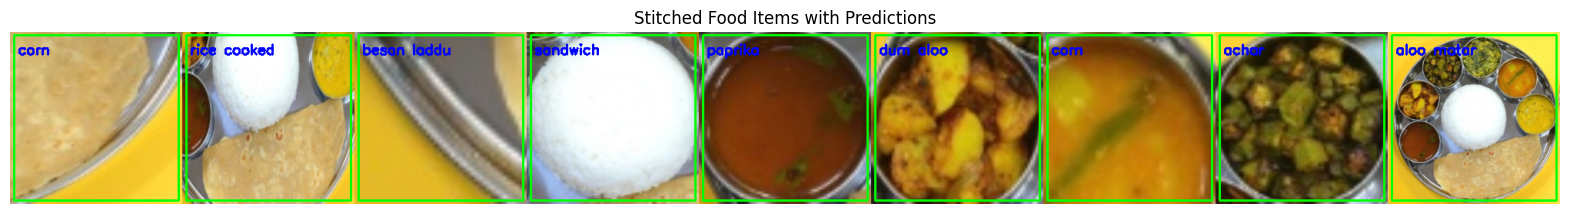

In [7]:
import os
import cv2
import torch
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the model and load state dict (already done by you)
# Assuming: model is already loaded and model.eval() is called

# Transforms used during training
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Your class names
class_names =  ['achar', 'aloo gobi', 'aloo matar', 'aloo methi', 'aloo puri', 'aloo tikki', 'appam', 'apple', 'apple pie', 'bagels', 'baingan bharta', 'banana', 'basundi', 'beetroot', 'besan cheela', 'besan laddu', 'bhel puri', 'bhindi masala', 'biryani', 'boondi', 'brownie', 'butter chicken', 'cabbage', 'cake', 'canned potatoes', 'capsicum', 'carrots', 'cauliflower', 'chai', 'chana masala', 'chapati', 'chicken rezala', 'chicken tikka', 'chicken tikka masala', 'chilli pepper', 'chilli potato', 'chole bhature', 'chop suey', 'chow mein', 'cooked oatmeal', 'cooked pasta', 'corn', 'cucumber', 'dal makhani', 'dal tadka', 'dhokla', 'doughnut', 'dum aloo', 'fried chicken', 'fried fish', 'fried rice', 'gajar ka halwa', 'garlic', 'ginger', 'gobi manchurian', 'grape', 'gujiya', 'gulab jamun', 'hot dogs', 'ice cream', 'idli', 'imarti', 'jalebi', 'kachori', 'kadai paneer', 'kadhi pakoda', 'kaju katli', 'kalakand', 'kathi roll', 'kebabs', 'khandvi', 'khichdi', 'khubani ka meetha', 'kiwi', 'kofta', 'kulfi', 'lassi', 'lemon', 'lemonade', 'lettuce', 'litti chokha', 'macaroni salad', 'malpua', 'mango', 'masala dosa', 'medu vada', 'mishti doi', 'missi roti', 'modak', 'momos', 'muffin', 'mysore pak', 'naan bread', 'navratan korma', 'omelette', 'onion', 'onion pakoda', 'orange', 'palak paneer', 'pan cake', 'pan-fried prawns', 'paneer butter masala', 'pani puri', 'papad', 'paprika', 'paratha', 'pav bhaji', 'peanut chikki', 'pear', 'peas', 'peda', 'phirni', 'pineapple', 'pizza', 'poha', 'pomegranate', 'popcorn', 'rabri', 'radish', 'raj kachori', 'rajma', 'ras malai', 'rasgulla', 'rice cooked', 'samosa', 'sandwich', 'scrambled eggs', 'shankarpali', 'sheer khurma', 'sheera', 'shelled soy bean', 'shrikhand', 'spinach', 'spring rolls', 'sprouts', 'stuffed karela', 'sunny side up eggs', 'sweet potatoes', 'taco', 'tiramisu', 'toast', 'tomato', 'turnip', 'uttapam', 'vada pav', 'veggie burger', 'waffle', 'watermelon']
# Folder with segmented images
folder = "food_segments"
image_files = sorted([f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

# Output image list
annotated_images = []

for fname in image_files:
    img_path = os.path.join(folder, fname)
    
    # Read and preprocess image
    image = Image.open(img_path).convert('RGB')
    input_tensor = transform(image).unsqueeze(0).to(device)
    
    # Predict class
    with torch.no_grad():
        output = model(input_tensor)
        pred_class = class_names[output.argmax(1).item()]
    
    # Load image with OpenCV for annotation
    img_cv = cv2.imread(img_path)
    img_cv = cv2.resize(img_cv, (224, 224))  # match training input size
    
    # Draw bounding box + text
    cv2.rectangle(img_cv, (5, 5), (219, 219), (0, 255, 0), 2)
    cv2.putText(img_cv, pred_class, (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
    
    annotated_images.append(img_cv)

# Stitch all images horizontally
stitched = cv2.hconcat(annotated_images)

# Show result
plt.figure(figsize=(20, 5))
plt.imshow(cv2.cvtColor(stitched, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Stitched Food Items with Predictions")
plt.show()


In [30]:
pip install --upgrade matplotlib pybind11


  Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl (8.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.9.2
    Uninstalling matplotlib-3.9.2:
      Successfully uninstalled matplotlib-3.9.2
Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
import numpy as np
import cv2
from PIL import Image
import os
from matplotlib import pyplot as plt

# Load MiDaS model
def load_midas():
    model_type = "DPT_Large"
    midas = torch.hub.load("intel-isl/MiDaS", model_type)
    midas.eval()
    transform = torch.hub.load("intel-isl/MiDaS", "transforms").dpt_transform
    return midas, transform

# Get depth map
def get_depth_map(image_path, midas, transform):
    img = Image.open(image_path).convert("RGB")
    input_batch = transform(img).unsqueeze(0)
    with torch.no_grad():
        prediction = midas(input_batch)[0]
    depth = prediction.squeeze().cpu().numpy()
    return depth

# Estimate volume from mask and depth
def estimate_volume_from_mask(mask, depth_map):
    masked_depth = depth_map * (mask / 255.0)
    avg_depth = np.mean(masked_depth[mask > 0])
    area_px = np.sum(mask > 0)
    volume = area_px * avg_depth * 0.001  # scale from px³ to cm³ (tunable)
    return volume

# Estimate weight and calories (approximate)
def estimate_quantity_from_volume(volume_cm3):
    avg_density = 1.0  # g/cm³ (can be tuned or adapted per food)
    weight = volume_cm3 * avg_density
    calories = weight * 1.3  # assume 1.3 kcal/g on avg
    return weight, calories

# Main
def process_segmented_food_items(image_path, mask_folder):
    midas, transform = load_midas()
    depth_map = get_depth_map(image_path, midas, transform)

    for mask_file in sorted(os.listdir(mask_folder)):
        if mask_file.endswith(".png"):
            food_label = os.path.splitext(mask_file)[0]
            mask_path = os.path.join(mask_folder, mask_file)
            mask = cv2.imread(mask_path, 0)  # binary mask

            volume = estimate_volume_from_mask(mask, depth_map)
            weight, calories = estimate_quantity_from_volume(volume)

            print(f"{food_label}: Volume = {volume:.2f} cm³, Weight = {weight:.2f} g, Calories = {calories:.2f} kcal")


In [5]:
process_segmented_food_items(r"C:\Users\monis\OneDrive\Desktop\sem6\project\aloo matar.png",r"C:\Users\monis\OneDrive\Desktop\sem6\project\masks")


Using cache found in C:\Users\monis/.cache\torch\hub\intel-isl_MiDaS_master


ModuleNotFoundError: No module named 'pymodbus.client.asynchronous'

In [3]:
pip install transformers timm accelerate opencv-python matplotlib numpy pillow



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\monis\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\monis\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\monis\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Users\monis\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\monis\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\monis\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\monis\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Users\monis\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\monis\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\monis\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\monis\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Users\monis\anaconda3\Lib\site-pack

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\monis\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\monis\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\monis\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Users\monis\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


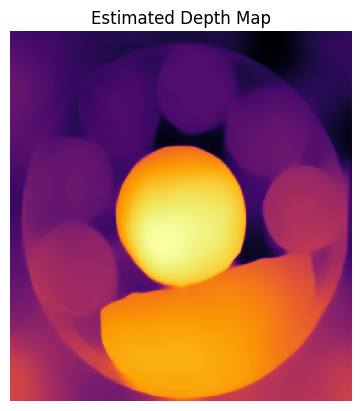

In [1]:
from transformers import DPTImageProcessor, DPTForDepthEstimation
from PIL import Image
import torch
import matplotlib.pyplot as plt
import numpy as np

# Load image
image_path = r"C:\Users\monis\OneDrive\Desktop\sem6\project\aloo matar.png"
image = Image.open(image_path).convert("RGB")

# Load processor and model
processor = DPTImageProcessor.from_pretrained("Intel/dpt-large")
model = DPTForDepthEstimation.from_pretrained("Intel/dpt-large")

# Preprocess image
inputs = processor(images=image, return_tensors="pt")

# Predict
with torch.no_grad():
    outputs = model(**inputs)
    predicted_depth = outputs.predicted_depth

# Resize to original image size
predicted_depth = torch.nn.functional.interpolate(
    predicted_depth.unsqueeze(1),
    size=image.size[::-1],
    mode="bicubic",
    align_corners=False,
).squeeze()

# Convert to numpy
depth = predicted_depth.numpy()
depth_min = depth.min()
depth_max = depth.max()
depth_normalized = (depth - depth_min) / (depth_max - depth_min)

# Show depth map
plt.imshow(depth_normalized, cmap="inferno")
plt.axis("off")
plt.title("Estimated Depth Map")
plt.show()



📦 Estimated Grams per Mask (normalized to 1000g):
achar.png: 31.29 g
besan laddu.png: 21.74 g
corn.png: 33.07 g
dum aloo.png: 54.69 g
paprika.png: 16.29 g
rice cooked.png: 610.25 g
sandwich.png: 232.68 g

📊 Nutritional Breakdown (Estimated):
---------------------------------------------
achar: 31.29g | 31.3 cal, 6.3g carbs, 1.6g proteins, 1.6g fats
besan laddu: 21.74g | 21.7 cal, 4.3g carbs, 1.1g proteins, 1.1g fats
corn: 33.07g | 33.1 cal, 6.6g carbs, 1.7g proteins, 1.7g fats
dum aloo: 54.69g | 54.7 cal, 10.9g carbs, 2.7g proteins, 2.7g fats
paprika: 16.29g | 16.3 cal, 3.3g carbs, 0.8g proteins, 0.8g fats
rice cooked: 610.25g | 610.2 cal, 122.0g carbs, 30.5g proteins, 30.5g fats
sandwich: 232.68g | 232.7 cal, 46.5g carbs, 11.6g proteins, 11.6g fats

🔥 Total Nutritional Intake:
Calories     : 1000.0 kcal
Carbohydrates: 200.0 g
Proteins     : 50.0 g
Fats         : 50.0 g


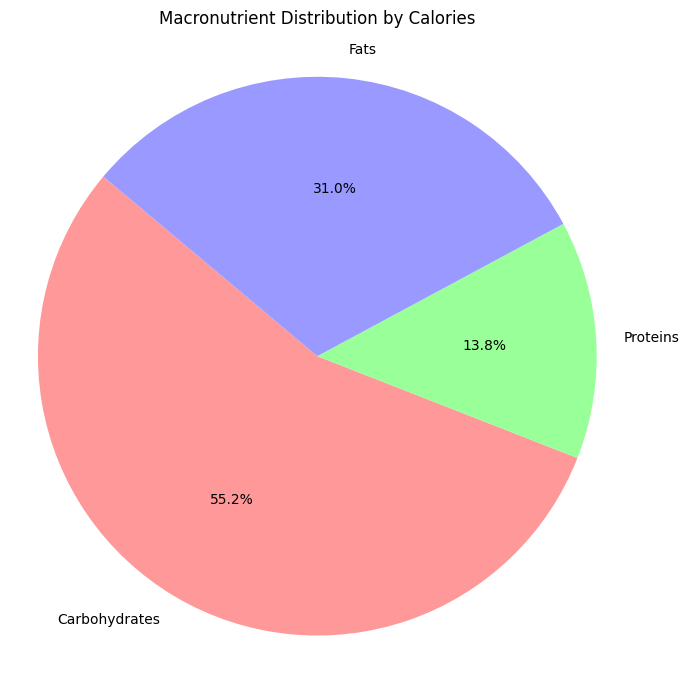

In [13]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === 1. Estimate weight (grams) from masks ===
def estimate_pixel_area(mask_path):
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask is None:
        print(f"Error reading mask: {mask_path}")
        return 0
    _, binary_mask = cv2.threshold(mask, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    pixel_count = np.sum(binary_mask)
    return pixel_count

def estimate_weights_from_masks(mask_folder, total_weight=1000):
    pixel_areas = []
    file_names = []

    for mask_file in sorted(os.listdir(mask_folder)):
        mask_path = os.path.join(mask_folder, mask_file)
        pixel_count = estimate_pixel_area(mask_path)
        file_names.append(mask_file)
        pixel_areas.append(pixel_count)

    total_pixels = sum(pixel_areas)
    results = []

    print("\n📦 Estimated Grams per Mask (normalized to 1000g):")
    for name, pixels in zip(file_names, pixel_areas):
        grams = (pixels / total_pixels) * total_weight if total_pixels > 0 else 0.0
        print(f"{name}: {grams:.2f} g")
        results.append((name, np.float32(grams)))
    return results

# === 2. Calculate Nutrition from grams ===
def estimate_nutrition(final_results, nutrition_csv):
    nutrition_df = pd.read_csv(nutrition_csv)
    nutrition_df['food_item'] = nutrition_df['food_item'].str.lower().str.strip()

    total_calories = total_carbs = total_proteins = total_fats = 0.0

    print("\n📊 Nutritional Breakdown (Estimated):")
    print("-" * 45)

    for filename, grams in final_results:
        food_item = os.path.splitext(filename)[0].lower().strip()
        match = nutrition_df[nutrition_df['food_item'] == food_item]

        if not match.empty:
            row = match.iloc[0]
            factor = grams / 100.0  # nutrition per 100g

            cals = row['calories'] * factor
            carbs = row['carbohydrates'] * factor
            prots = row['proteins'] * factor
            fats = row['fats'] * factor

            total_calories += cals
            total_carbs += carbs
            total_proteins += prots
            total_fats += fats

            print(f"{food_item}: {grams:.2f}g | {cals:.1f} cal, {carbs:.1f}g carbs, {prots:.1f}g proteins, {fats:.1f}g fats")
        else:
            print(f"{food_item}: 🫥 No nutritional data found in CSV.")

    print("\n🔥 Total Nutritional Intake:")
    print(f"Calories     : {total_calories:.1f} kcal")
    print(f"Carbohydrates: {total_carbs:.1f} g")
    print(f"Proteins     : {total_proteins:.1f} g")
    print(f"Fats         : {total_fats:.1f} g")

    return total_calories, total_carbs, total_proteins, total_fats

# === 3. Pie chart for macro kcal breakdown ===
def plot_macro_pie_chart(carbs, prots, fats):
    labels = ['Carbohydrates', 'Proteins', 'Fats']
    values = [carbs * 4, prots * 4, fats * 9]
    colors = ['#FF9999', '#99FF99', '#9999FF']

    plt.figure(figsize=(7, 7))
    plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
    plt.title('Macronutrient Distribution by Calories')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# === Run the full pipeline ===
mask_folder = r"C:\Users\monis\OneDrive\Desktop\sem6\project\masks"
nutrition_csv =r"C:\Users\monis\Downloads\food_item_macros.xlsx"

final_results = estimate_weights_from_masks(mask_folder, total_weight=1000)
total_cals, total_carbs, total_prots, total_fats = estimate_nutrition(final_results, nutrition_csv)
plot_macro_pie_chart(total_carbs, total_prots, total_fats)


In [40]:
import csv

# Your food data dictionary
food_data = {
    'achar': {'calories': 150, 'carbohydrates': 15, 'proteins': 1, 'fats': 10},
    'aloo gobi': {'calories': 86, 'carbohydrates': 10, 'proteins': 2, 'fats': 4},
    'aloo matar': {'calories': 98, 'carbohydrates': 12, 'proteins': 3, 'fats': 4},
    'aloo methi': {'calories': 120, 'carbohydrates': 15, 'proteins': 4, 'fats': 5},
    'aloo puri': {'calories': 250, 'carbohydrates': 30, 'proteins': 5, 'fats': 12},
    'aloo tikki': {'calories': 150, 'carbohydrates': 20, 'proteins': 3, 'fats': 6},
    'appam': {'calories': 120, 'carbohydrates': 25, 'proteins': 3, 'fats': 1},
    'apple': {'calories': 52, 'carbohydrates': 14, 'proteins': 0.3, 'fats': 0.2},
    'apple pie': {'calories': 237, 'carbohydrates': 34, 'proteins': 2, 'fats': 11},
    'bagels': {'calories': 250, 'carbohydrates': 50, 'proteins': 10, 'fats': 1},
    'baingan bharta': {'calories': 102, 'carbohydrates': 12, 'proteins': 2, 'fats': 5},
    'banana': {'calories': 89, 'carbohydrates': 23, 'proteins': 1.1, 'fats': 0.3},
    'basundi': {'calories': 150, 'carbohydrates': 20, 'proteins': 5, 'fats': 6},
    'beetroot': {'calories': 43, 'carbohydrates': 10, 'proteins': 1.6, 'fats': 0.2},
    'besan cheela': {'calories': 180, 'carbohydrates': 20, 'proteins': 10, 'fats': 6},
    'besan laddu': {'calories': 450, 'carbohydrates': 50, 'proteins': 10, 'fats': 20},
    'bhel puri': {'calories': 320, 'carbohydrates': 60, 'proteins': 8, 'fats': 6},
    'bhindi masala': {'calories': 120, 'carbohydrates': 15, 'proteins': 3, 'fats': 6},
    'biryani': {'calories': 150, 'carbohydrates': 25, 'proteins': 5, 'fats': 3},
    'boondi': {'calories': 400, 'carbohydrates': 50, 'proteins': 8, 'fats': 18},
    'brownie': {'calories': 466, 'carbohydrates': 60, 'proteins': 5, 'fats': 22},
    'butter chicken': {'calories': 150, 'carbohydrates': 5, 'proteins': 15, 'fats': 8},
    'cabbage': {'calories': 25, 'carbohydrates': 6, 'proteins': 1.3, 'fats': 0.1},
    'cake': {'calories': 350, 'carbohydrates': 50, 'proteins': 5, 'fats': 15},
    'canned potatoes': {'calories': 70, 'carbohydrates': 15, 'proteins': 1.5, 'fats': 0.1},
    'capsicum': {'calories': 20, 'carbohydrates': 4.6, 'proteins': 0.9, 'fats': 0.2},
    'carrots': {'calories': 41, 'carbohydrates': 10, 'proteins': 0.9, 'fats': 0.2},
    'cauliflower': {'calories': 25, 'carbohydrates': 5, 'proteins': 1.9, 'fats': 0.3},
    'chai': {'calories': 50, 'carbohydrates': 8, 'proteins': 2, 'fats': 1},
    'chana masala': {'calories': 180, 'carbohydrates': 30, 'proteins': 8, 'fats': 4},
    'chapati': {'calories': 300, 'carbohydrates': 45, 'proteins': 8, 'fats': 6},
    'chicken rezala': {'calories': 180, 'carbohydrates': 5, 'proteins': 20, 'fats': 10},
    'chicken tikka': {'calories': 150, 'carbohydrates': 3, 'proteins': 20, 'fats': 6},
    'chicken tikka masala': {'calories': 180, 'carbohydrates': 5, 'proteins': 18, 'fats': 8},
    'chilli pepper': {'calories': 40, 'carbohydrates': 9, 'proteins': 2, 'fats': 0.4},
    'chilli potato': {'calories': 250, 'carbohydrates': 35, 'proteins': 5, 'fats': 10},
    'chole bhature': {'calories': 300, 'carbohydrates': 45, 'proteins': 10, 'fats': 8},
    'chop suey': {'calories': 150, 'carbohydrates': 20, 'proteins': 10, 'fats': 5},
    'chow mein': {'calories': 150, 'carbohydrates': 25, 'proteins': 6}
}

# Write to CSV
with open('indian_food_nutrition.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # Write header
    writer.writerow(['food_item', 'calories', 'carbohydrates', 'proteins', 'fats'])
    # Write data rows
    for item, nutrients in food_data.items():
        writer.writerow([
            item,
            nutrients.get('calories', ''),
            nutrients.get('carbohydrates', ''),
            nutrients.get('proteins', ''),
            nutrients.get('fats', '')
        ])

print("CSV file 'indian_food_nutrition.csv' created successfully.")


CSV file 'indian_food_nutrition.csv' created successfully.


In [44]:
pip install --upgrade pandas pybind11


  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires pillow<11,>=7.1.0, but you have pillow 11.1.0 which is incompatible.
